# UCST and LCST

Using an enthalpic $\chi$ parameter of the former $\theta/2T$, I identified parameters that produce a UCST and LCST, as in Ye et al. (2020).

In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import salt
import pe
import plot
from bokeh.io import output_notebook
from bokeh.plotting import show

from importlib import reload
reload(salt)
reload(pe)

output_notebook()


# USER PARAMETERS
data_folder = 'salt/'
Z = 1 # charge per monomer (same for polyanion and polycation)
# array of temperatures in range considered in Adhikari et al. (2019)
T_arr = np.linspace(273, 323, 10)
# list of salt [KBr] concentrations [mol/L]
rho_s_list = [1.75, 2.0, 2.05]
# list of polyanion [PSS] concentrations [mol/L]
rho_p_list = [0.15, 0.3]
# list of hard-sphere diameters to try [m]
sigma_arr = np.linspace(100, 1000, 5)*1E-12
# accurate choice for sigma based on Bjerrum length of water (see Zhang et al. 2016)
sigma = 4E-10 # [m]
# list of degrees of polymerization to try
N = 100
# Avogadro's number [molecules/mol]
NA = 6.022E23
# conversion of meters^3 to L
m3_2_L = 1E3
# conversion from beads/sigma^3 to mol/L (M)
beads_2_M = (NA * sigma**3 * m3_2_L)**(-1)

Loading BokehJS ...

In [5]:
# loads binodal data
data = salt.load_data(data_folder + 'vdw_q_20/')

# computes coexistence for fixed average densities
rho_p = 0.9 # [M]
rho_s = 3.07 # [M]
result = salt.fixed_rho_total(data, rho_p, rho_s, beads_2_M)
rho_PCI_list, rho_PCII_list, rho_CI_list,  \
    rho_CII_list, lB_arr, alpha_list = result
# computes temperature for each Bjerrum length
T_arr = pe.lB_2_T_arr(lB_arr, [273, 373])

df_mu = pd.DataFrame()
df_mu['BJ'] = lB_arr
df_mu['T [K]'] = T_arr
# assigns monomer densities, noting that we assume symmetric cation and anions
df_mu['rhoPAI'] = rho_PCI_list # monomer densities
df_mu['rhoPAII'] = rho_PCII_list # monomer densities
df_mu['rhoAI'] = rho_CI_list
df_mu['rhoAII'] = rho_CII_list
df_mu_tidy = salt.tidy_df(df_mu)

########################### PLOTS RESULTS OVERLAID ON FULL BINODAL ##################################
sample_size = 40
df_full_molL = pd.concat([salt.tidy_df(df.sample(sample_size).reset_index(drop=True),
                                       sigma=sigma) for df in data.values() if len(df) > sample_size])
df_full_molL['T [K]'] = pe.lB_2_T_arr(df_full_molL['BJ'].to_numpy(dtype=float), [273, 373])
fig = px.scatter_3d(df_full_molL, x='rhoPA', y='rhoA', z='T [K]', color='phase', opacity=0.2)

# adds trace of fixed average density binodal
fig.add_trace(px.scatter_3d(df_mu_tidy, x='rhoPA', y='rhoA', z='T [K]', color='phase').data[0])
fig.add_trace(px.scatter_3d(df_mu_tidy, x='rhoPA', y='rhoA', z='T [K]', color='phase').data[1])

# edits plot range
fig.update_layout(
    scene = dict(zaxis = dict(range=[273, 373],),),)

fig.show()

KeyError: 'phase'

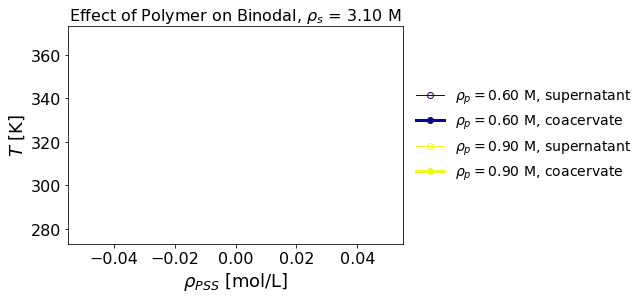

In [3]:
reload(salt)
data = salt.load_data(data_folder + 'vdw_q_20/')

rho_s = 3.1
# rho_p_list = [0.1, 0.3, 0.6, 0.9, 1.2, 1.5]
rho_p_list = [0.6, 0.9]

ax = plot.binodal_vary_rho(data, rho_p_list, rho_s, 'p', beads_2_M, lw=0)